About Dataset
Content
This is a simple dataset to start with. It contains only the height (inches) and weights (pounds) of 25,000 different humans of 18 years of age. This dataset can be used to build a model that can predict the heights or weights of a human.

Acknowledgement
Link: http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html
Scraped the aforementioned HTML page using a Regex Parser. (BeautifulSoup - Python)

Inspiration
Build a predictive model for determining height or weight of a person. Implement a regression model that will be used for predicting height or weight.

# Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the Data from CSV files

In [2]:
data = pd.read_csv("HeightWeight.csv")
print(data.head())

   Height(Inches)  Weight(Pounds)
0        65.78331        112.9925
1        71.51521        136.4873
2        69.39874        153.0269
3        68.21660        142.3354
4        67.78781        144.2971


# Data Preprossesing
## 1.) Finding Missing Data
## 2.) Encoding Categorical Data
## 3.) Splitting dataset into training and test set
## 4.) Feature scaling

### finding if dataset contains any null value

In [3]:
data.isnull().sum()

Height(Inches)    0
Weight(Pounds)    0
dtype: int64

The above List Shows that there isnt any missing values so we can proced futher

### Checking for the data type to encode the categorical (textual) data into numerical values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
Height(Inches)    25000 non-null float64
Weight(Pounds)    25000 non-null float64
dtypes: float64(2)
memory usage: 390.8 KB


As we can see there is 3 columns 
1.) Index
2.) Height
3.) Weight
in which, Index has integer type
Height has Floating Type
Weight has Floating type 
so there isnt any categorical value so we dont need to do Encoding the data

### Checking for the data if it has outliers 

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


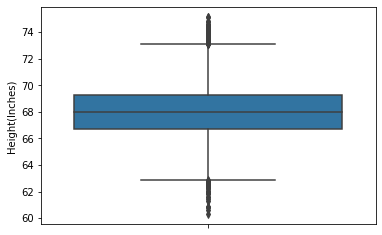

In [5]:
import seaborn as sns
sns.boxplot(y=data['Height(Inches)'],orient='h')

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


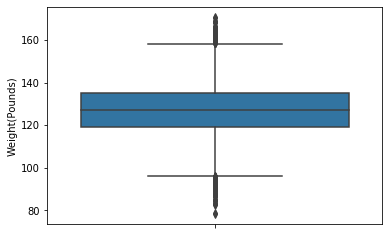

In [6]:
sns.boxplot(y=data['Weight(Pounds)'],orient='h')

As we can see in above diagram the points which is shown outside of the "whiskers" (the endge of the box plot that looks like "T" shape and upside down "T")

### Handling the Outliers

Finding the lower and upper limits for Height and Weight


In [7]:
print("Highest height allowed",data['Height(Inches)'].mean() + 3*data['Height(Inches)'].std())
print("Lowest height allowed",data['Height(Inches)'].mean() - 3*data['Height(Inches)'].std())

print("Highest weight allowed",data['Weight(Pounds)'].mean()+3*data['Weight(Pounds)'].std())
print("Highest weight allowed",data['Weight(Pounds)'].mean()-3*data['Weight(Pounds)'].std())

Highest height allowed 73.6981499104166
Lowest height allowed 62.28807728318297
Highest weight allowed 162.06211385161203
Highest weight allowed 92.09672846998629


Now we need to capping the values in nearer to this values. We can drop this outliers as well but it will
left with low records to train our algorithm 
which generates low accuracy so, we are going to capiing all this values

In [8]:
data[(data['Height(Inches)'] > 73.69) | (data['Height(Inches)'] < 62.28)]

,Height(Inches),Weight(Pounds)
138,73.90107,151.39130
174,73.83364,139.29830
412,62.01666,109.08480
1162,74.24899,150.21670
1383,74.19488,129.05970
1893,75.15280,146.97010
2395,73.99549,142.90160
2481,75.11519,153.95620
2651,60.61265,88.04646
3696,61.89340,95.74545


as we can see we are lossing this much amount of data if we dropping the outliers

In [9]:
new_data = data[(data['Height(Inches)'] < 73.69) & (data['Height(Inches)'] > 62.28)]
new_data

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


The above records shows us the outlier's records are in data set

In [10]:
upper_limit_height = data['Height(Inches)'].mean() + 3*data['Height(Inches)'].std()
lower_limit_height = data['Height(Inches)'].mean() - 3*data['Height(Inches)'].std()

upper_limit_weight = data['Weight(Pounds)'].mean() + 3*data['Weight(Pounds)'].std()
lower_limit_weight = data['Weight(Pounds)'].mean() - 3*data['Weight(Pounds)'].std()

The above code is to find the upper limit and lower limit that shows in above box plot 

### Capping the outliers within the range of the upper limit and lower limit

In [11]:
data['Height(Inches)'] = np.where(
    data['Height(Inches)']>upper_limit_height,
    upper_limit_height,
    np.where(
        data['Height(Inches)']<lower_limit_height,
        lower_limit_height,
        data['Height(Inches)']
    )
)

In [12]:
data['Weight(Pounds)'] = np.where(
    data['Weight(Pounds)']>upper_limit_weight,
    upper_limit_weight,
    np.where(
        data['Weight(Pounds)']<lower_limit_weight,
        lower_limit_weight,
        data['Weight(Pounds)']
    )
)

### Finding the Corelation between the 2 columns height and weight

In [13]:
data.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502572
Weight(Pounds),0.502572,1.000000


As we can see over here it says both column are corelated with each other with 0.5 which is slightly positive 
if it is 0.7 it could be highly positive 
if it is 0.9 or 1 it means it is strongly positive correlation between them

### Feature Selection Process

In [14]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

As we just have 2 columns in our dataset height and weight and we are clear to predict the weight using height so we have one attribut for input and one attribute as output variable. 

### Splitting the Training and Testing data

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

The reason we had put 0.2 in test_size in above function is because the standard value of training and testing size is 
80%:20% of ratio that means 80% of training set and 20% of testing set. 

### Training the model 

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We just have 2 things so we can use Linear regression as we had only 2 attributes and our data is satisfying the requierement for linear regression:- ans = X0 * a + b

where X0 is a constant and 'a' in our case is Height and 'b' in our case is Weight

### Predicting the Value of the Data set 

In [20]:
y_pred = reg.predict(X_test)
print(y_pred)

[123.34314631 134.00101028 124.68271745 ... 125.68547618 130.43153304
 123.0549744 ]
[[66.75233]
 [70.23626]
 [67.19022]
 ...
 [67.51801]
 [69.06944]
 [66.65813]]


We had trained our machine now its time to check its prediction

### Predicting our real life weight using the model we just build

In [21]:
print(reg.predict([[71]]),"pounds")

[136.33740539] pounds


so as we should have a lil bit confusion over here. we wrote 71 that is in inches for 5'11" 
we put it 71 because we have data in inches and pounds 
yes you guess correctly we are having 136.33740539 weight is in pounds which is equivalent to 61kgs 
that you can find the other online websites as well

Now to find our prediction we can find the BMI on web which is Body Mass Index according to that our model predicting the normal value